In [2]:
# preliminaries
import os
import os.path
import datetime
import numpy as np
from numpy import linalg as LA
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

import sys
sys.path.append("..")

# standard magic
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# disable warnings
import warnings
warnings.filterwarnings('ignore')

1.	Problem 1 (25 points): K-Means and Macro Man on BBG<br>
a.	Import FX spot rates from Currencies_1y.xls.<br>
b.	Calculate daily return.<br>
c.	Calculate mean return and stdev of return. <br>
d.	Perform K means using K = 3,4,5,6.<br>
e.	Plot a 2x2 figure with scatter plots with each color representing a cluster and currency label on the scatter plot.  Visualization exercise – your opportunity to play with graphics.<br>
f.	Use elbow method discussed in class plus qualitative argument to recommend # of clusters. <br>
g.	Discuss cluster traits. <br>



Reference: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

In [3]:
# import
root='C:/Users/Allen Tao/Desktop/FRE 7773/Assignments/A6/A6 Data/'
fx = pd.read_csv(root+'Currencies_1yr.csv', index_col='Dates', parse_dates=True)
fx.dropna(inplace=True)
# fx.tail()
# fx.describe()


In [4]:
# daily return
fx_dret = fx.pct_change(1)
fx_dret.dropna(inplace=True)
# fx_dret.tail()
# fx_dret.describe()


In [5]:
# mean & std
fx_dret_mean = fx_dret.mean()
fx_dret_std = fx_dret.std(ddof=1)

fx_dret_stat = pd.concat([fx_dret_mean, fx_dret_std], axis=1, keys=['mean', 'std'])
fx_dret_stat


,mean,std
USD Curncy,0.000000,0.000000
EUR Curncy,0.000228,0.004373
GBP Curncy,0.000233,0.006834
JPY Curncy,0.000023,0.005424
AUD Curncy,0.000295,0.006986
NZD Curncy,0.000146,0.006529
CAD Curncy,-0.000026,0.004863
CHF Curncy,-0.000233,0.004373
NOK Curncy,0.000072,0.010147
SEK Curncy,-0.000312,0.006119


In [6]:
# Perform K means using K = 3,4,5,6
from sklearn.cluster import KMeans

def kmclusters(n, X=fx_dret_stat):
    """
    find n clusters w/ kmeans, on the data X default to fx_dret_stat
    input: X: df, fx rate for a range of dates; n: arr of int, no. of centers of kmean
    output: array of len(n) arrays containing [kmeans model, preidction]
    """
    res = []
    for num in n:
        km = KMeans(n_clusters=num, random_state=42, init='random')
        y_km = km.fit_predict(X)
        res.append([km, y_km])
    return res

In [7]:
res = kmclusters([3, 4, 5, 6])
res

[[KMeans(init='random', n_clusters=3, random_state=42),
  array([2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2])],
 [KMeans(init='random', n_clusters=4, random_state=42),
  array([0, 1, 3, 1, 3, 3, 1, 1, 2, 3, 2, 0, 1, 3, 0, 3, 1, 1, 1, 0])],
 [KMeans(init='random', n_clusters=5, random_state=42),
  array([0, 1, 2, 1, 2, 2, 1, 1, 4, 2, 4, 3, 3, 2, 3, 2, 1, 1, 1, 3])],
 [KMeans(init='random', n_clusters=6, random_state=42),
  array([4, 2, 5, 0, 5, 5, 0, 2, 3, 5, 3, 1, 2, 5, 1, 5, 2, 2, 2, 1])]]

In [8]:
# visualize
def km_vis(arr):
    """
    take collections of [km models, predictions], plot the results of clusters prediction along with centroids
    input: arr: arr oflen(n) arr with vars[km models, predictions]
    output: scatter plots
    """
    
    for i in range(len(arr)):
    # scatter, color
        fig1 = plt.figure(i)
        ax1 = fig1.add_subplot(111)
        ax1.scatter(fx_dret_stat['mean'], fx_dret_stat['std'], marker='o', c=arr[i][1], alpha = 0.8)
        # centriods
        ax1.scatter(arr[i][0].cluster_centers_[:,0], arr[i][0].cluster_centers_[:,1], marker='*', c='red', alpha = 0.8)
    return None


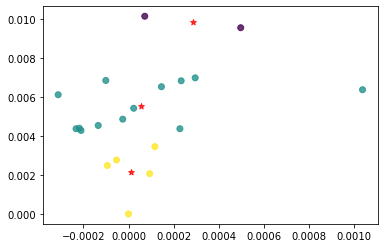

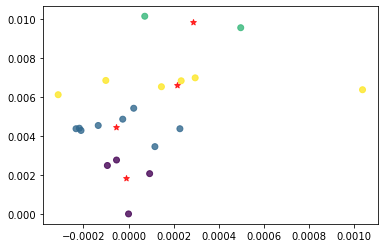

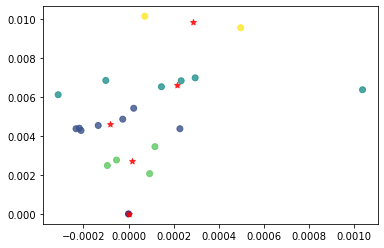

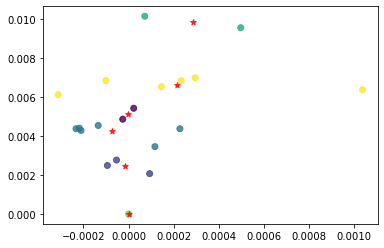

In [9]:
km_vis(res)

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Distortion')

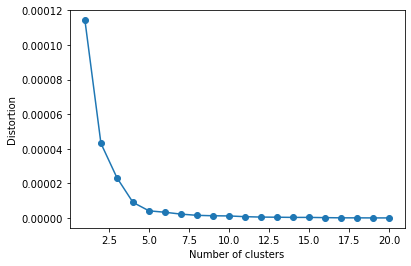

In [10]:
# elbow
dist = []
for n in range(1,len(fx_dret_stat) + 1):
    km = KMeans(n_clusters=n, random_state=42, init='random')
    _ = km.fit(fx_dret_stat)
    dist.append(km.inertia_)

# plot elbow
plt.plot(range(1, 21), dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The elbow is at 5. Thus the optimal number of clusters is 5.

2.	Problem 2 (25 points): Shrinking the covariance matrix<br>
a.	Read http://www.ledoit.net/honey.pdf, https://scikit-learn.org/stable/modules/covariance.html#shrunk-covariance.  Write 2 sentences on your understanding of the methodology.<br>
b.	Create a 1000x20 matrix “X” from random normal dist.  Create new matrix X* that is a copy of X.  Replace last two columns with first column with 1e-4 random normal noise added to it.  <br>
c.	Calculate the covariance matrix of X and X* (Sigma, Sigma*) and the corresponding condition number.<br>
d.	Shrink covariace matrix using OAS and Ledoit and Wolf.  Calculate the condition number after shrinkage.<br>
e.	One sentence on the difference between the two.<br>


a.
<br>Portfolio mean/var optimization with traditional covar matrix is troubled due to the large number of stocks and the relatively small historical data (thus extreme errors occur predictions). Shirnking (reducing positive extremes and increasing negative extremes, or in human's words a weighted avg (weight=sigma=shrinkage constant) of covar matrix and highly structured estimator) transformation yields a better outcome. 

Equation is sigma* * F + (1-sigma* ) * S

F_ii = s_ii; F_ij = r_bar * sqrt(s_ii * s_ij), where s = sample covar; r_bar = avg sample corr (appendix A)

sigma* = argmin(sigma) E|shrinkage estimator - true cov matrix| (appendix B)


In [11]:
# b. generate matrix
X = pd.DataFrame(np.random.normal(loc=0.0, scale=1.0, size=(1000, 20))) # i prefer df to visualize
Xs = X.copy(deep=True)
Xs.iloc[:, -2] = Xs.iloc[:, 0] + np.random.normal(loc=0.0, scale=1e-4, size=(1000,))
Xs.iloc[:, -1] = Xs.iloc[:, 0] + np.random.normal(loc=0.0, scale=1e-4, size=(1000,))
Xs.iloc[:, -2:].tail()

,18,19
995,0.121200,0.121354
996,-1.938381,-1.938709
997,-0.691815,-0.692056
998,-0.116743,-0.116782
999,0.962368,0.962627


In [12]:
# c cov matrix
Xc = X.cov()
Xsc = Xs.cov()
Xc
Xsc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.029836,0.004041,0.042821,0.009879,-0.020551,-0.004580,-0.002176,-0.047686,0.041532,0.005919,0.002123,-0.007777,0.029681,-0.025319,0.046735,-0.028433,-0.086874,0.015010,-0.028770,-0.001261
1,0.004041,0.906430,0.059278,-0.034699,0.000450,0.005221,-0.000193,0.005950,0.046052,-0.012050,0.037186,-0.023627,-0.023457,0.028416,0.008863,0.009025,0.005924,0.040259,-0.003447,-0.000768
2,0.042821,0.059278,1.019652,-0.016774,-0.006211,0.019156,0.014046,-0.035850,-0.027430,0.034217,-0.079630,0.049457,-0.004063,0.027390,-0.036183,-0.001089,-0.003639,-0.021824,-0.024844,0.012282
3,0.009879,-0.034699,-0.016774,0.985099,-0.017662,-0.009621,-0.035128,0.028962,0.058935,0.044418,0.019438,-0.014193,0.012257,-0.041477,0.016781,0.024783,-0.076954,-0.009593,0.009999,-0.042240
4,-0.020551,0.000450,-0.006211,-0.017662,1.027509,-0.040302,-0.009889,-0.003372,-0.056404,0.035340,0.062994,0.010214,-0.021682,-0.014280,0.003660,-0.027987,-0.050744,-0.025847,0.014366,0.007113
5,-0.004580,0.005221,0.019156,-0.009621,-0.040302,1.061086,-0.039514,-0.017113,-0.018506,-0.043886,-0.005458,-0.049890,0.030303,0.039271,-0.037089,-0.006585,0.014095,-0.002784,0.021411,-0.000056
6,-0.002176,-0.000193,0.014046,-0.035128,-0.009889,-0.039514,0.983643,-0.010881,-0.061408,-0.045580,-0.001712,-0.026577,0.026881,-0.004349,-0.083573,0.039649,0.008062,-0.008828,-0.024847,0.006010
7,-0.047686,0.005950,-0.035850,0.028962,-0.003372,-0.017113,-0.010881,0.995344,-0.025241,-0.010507,-0.011744,-0.062850,-0.008041,0.000248,0.040683,0.011222,-0.012291,0.020159,0.037027,0.020925
8,0.041532,0.046052,-0.027430,0.058935,-0.056404,-0.018506,-0.061408,-0.025241,1.013991,0.021995,-0.050234,-0.036923,0.014680,-0.036368,-0.017640,0.019618,0.001411,-0.018408,0.069268,-0.028983
9,0.005919,-0.012050,0.034217,0.044418,0.035340,-0.043886,-0.045580,-0.010507,0.021995,0.937034,-0.005567,0.022336,0.012237,0.037070,-0.018807,-0.027547,0.012403,0.009505,-0.017591,-0.013603


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.029836,0.004041,0.042821,0.009879,-0.020551,-0.004580,-0.002176,-0.047686,0.041532,0.005919,0.002123,-0.007777,0.029681,-0.025319,0.046735,-0.028433,-0.086874,0.015010,1.029839,1.029839
1,0.004041,0.906430,0.059278,-0.034699,0.000450,0.005221,-0.000193,0.005950,0.046052,-0.012050,0.037186,-0.023627,-0.023457,0.028416,0.008863,0.009025,0.005924,0.040259,0.004045,0.004043
2,0.042821,0.059278,1.019652,-0.016774,-0.006211,0.019156,0.014046,-0.035850,-0.027430,0.034217,-0.079630,0.049457,-0.004063,0.027390,-0.036183,-0.001089,-0.003639,-0.021824,0.042815,0.042822
3,0.009879,-0.034699,-0.016774,0.985099,-0.017662,-0.009621,-0.035128,0.028962,0.058935,0.044418,0.019438,-0.014193,0.012257,-0.041477,0.016781,0.024783,-0.076954,-0.009593,0.009881,0.009874
4,-0.020551,0.000450,-0.006211,-0.017662,1.027509,-0.040302,-0.009889,-0.003372,-0.056404,0.035340,0.062994,0.010214,-0.021682,-0.014280,0.003660,-0.027987,-0.050744,-0.025847,-0.020548,-0.020549
5,-0.004580,0.005221,0.019156,-0.009621,-0.040302,1.061086,-0.039514,-0.017113,-0.018506,-0.043886,-0.005458,-0.049890,0.030303,0.039271,-0.037089,-0.006585,0.014095,-0.002784,-0.004580,-0.004586
6,-0.002176,-0.000193,0.014046,-0.035128,-0.009889,-0.039514,0.983643,-0.010881,-0.061408,-0.045580,-0.001712,-0.026577,0.026881,-0.004349,-0.083573,0.039649,0.008062,-0.008828,-0.002174,-0.002178
7,-0.047686,0.005950,-0.035850,0.028962,-0.003372,-0.017113,-0.010881,0.995344,-0.025241,-0.010507,-0.011744,-0.062850,-0.008041,0.000248,0.040683,0.011222,-0.012291,0.020159,-0.047686,-0.047682
8,0.041532,0.046052,-0.027430,0.058935,-0.056404,-0.018506,-0.061408,-0.025241,1.013991,0.021995,-0.050234,-0.036923,0.014680,-0.036368,-0.017640,0.019618,0.001411,-0.018408,0.041535,0.041528
9,0.005919,-0.012050,0.034217,0.044418,0.035340,-0.043886,-0.045580,-0.010507,0.021995,0.937034,-0.005567,0.022336,0.012237,0.037070,-0.018807,-0.027547,0.012403,0.009505,0.005918,0.005914


In [13]:
# conditional numbers
Xcond = LA.cond(Xc)
Xscond = LA.cond(Xsc)
print(f"X cov conditinal number's {Xcond}")
print(f"Xs cov conditinal number's {Xscond}")

X cov conditinal number's 1.6351969622266325
Xs cov conditinal number's 935759127.6550726


In [19]:
from sklearn import covariance
def shrink(X):
    """
    shrink cov matrix X with OAS (shrinkage=shrinkage used in lw) and ledoit_wolf
    input: X: pd df cov matrix
    output: conditional number of the two shirnked matrices
    """
    Xlw = covariance.ledoit_wolf(X)
    Xlw_cond = LA.cond(Xlw[0])
    Xoas = covariance.shrunk_covariance(X, shrinkage=Xlw[1])
    Xoas_cond = LA.cond(Xsc)
    return Xoas_cond, Xlw_cond

In [20]:
# shrink Xc
Xc_oas_cond, Xc_lw_cond = shrink(Xc)
Xc_oas_cond, Xc_lw_cond

(935759127.6550726, 1.0)

In [21]:
# shrink Xsc
Xsc_oas_cond, Xsc_lw_cond = shrink(Xsc)
Xsc_oas_cond, Xsc_lw_cond

(935759127.6550726, 6.785760652656624)

despite the huge idff in the original cond. numbers, the shrinked matrices produced similar results comparing X vs. Xs. 
for X: OAS and lw produced similar results; for Xs: OAS and lw produced different results, yet the magnitude isn't as dramatic as the unshrinked covar matrix

3.	Problem 3 (50 points): Hierarchical Risk Parity: use the price data provided in index_prices.csv.<br>
a.	Calculate Daily Returns <br>
b.	Calculate covariance matrix<br>
c.	Calculate condition number <br>
d.	Use OAS, calculate condition number<br>
e.	Perform agglomerative clustering<br>
f.	Plot Dendrogram – describe the different clusters.<br>
g.	Get HRP weights using provided functions.<br>


In [22]:
# import
root='C:/Users/Allen Tao/Desktop/FRE 7773/Assignments/A6/A6 Data/'
ip = pd.read_csv(root+'index_prices.csv', index_col='Date', parse_dates=True)
ip.dropna(inplace=True)


In [23]:
# a daily returns
ip_dret = ip.pct_change(1)
ip_dret.dropna(inplace=True)
ip_dret

,AGG,TLT,IEF,LQD,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EFA,EWJ,EWW,EWY,EZU
Date,,,,,,,,,,,,,,,,,,
2017-09-19,-0.000546,-0.002458,-0.001119,0.000579,0.005144,0.004083,0.007582,0.001003,0.004422,-0.003074,-0.002030,-0.007872,-0.000896,0.004696,0.005792,-0.004650,0.003293,0.004875
2017-09-20,-0.000820,0.000715,-0.001960,-0.001240,0.003529,0.006778,0.005941,0.007301,-0.004064,-0.009614,-0.007396,0.000977,0.003362,-0.002191,0.000360,0.003774,-0.005280,-0.004851
2017-09-21,-0.000182,-0.000556,-0.001309,0.000000,-0.002110,0.000299,0.002362,0.002985,-0.005441,-0.009524,-0.000186,-0.005122,-0.001675,-0.002049,-0.003958,-0.002327,-0.000143,0.000696
2017-09-22,0.000729,0.002861,0.001779,0.001324,-0.003524,0.005085,-0.001178,0.002551,0.000513,-0.002959,-0.008198,0.000000,0.001678,0.003080,0.001084,0.004665,-0.005166,0.002088
2017-09-25,0.002369,0.006260,0.002991,0.003720,0.001768,0.014435,-0.001180,0.000000,-0.011791,0.007233,0.009205,-0.002942,-0.002122,-0.005703,0.002165,-0.007144,-0.006491,-0.010880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-10,-0.005389,-0.017528,-0.007276,-0.008415,0.009835,0.011792,0.003589,0.009170,-0.005069,-0.006199,0.001280,0.002875,-0.003973,0.001700,0.002899,-0.002114,0.008066,0.002058
2019-09-11,0.000178,-0.001777,-0.000983,-0.000793,0.009565,0.000985,0.005723,0.009342,0.010437,0.003611,0.009907,0.009924,0.001872,0.005553,0.008853,0.004707,0.009957,0.002824
2019-09-12,-0.001599,-0.006551,-0.002237,-0.001349,0.007752,-0.006232,0.005334,0.000634,0.005411,0.004089,0.002215,-0.000328,0.004794,0.005829,0.006626,0.002577,0.011268,0.009217


In [24]:
# cov matrix
ip_dret_c = ip_dret.cov()
ip_dret_c


,AGG,TLT,IEF,LQD,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EFA,EWJ,EWW,EWY,EZU
AGG,3.311079e-06,0.000010,0.000005,4.401203e-06,-3.972285e-06,-5.087956e-06,-0.000008,-4.833951e-06,-0.000004,-3.758832e-08,0.000004,-0.000002,-0.000003,-0.000002,-0.000002,-8.044312e-07,-0.000002,-0.000003
TLT,1.040078e-05,0.000041,0.000017,1.377137e-05,-2.241699e-05,-2.506013e-05,-0.000035,-2.680071e-05,-0.000024,-4.769238e-06,0.000012,-0.000015,-0.000021,-0.000016,-0.000016,-1.106116e-05,-0.000018,-0.000020
IEF,4.763300e-06,0.000017,0.000008,5.861373e-06,-1.146686e-05,-1.285718e-05,-0.000017,-1.341662e-05,-0.000013,-2.833640e-06,0.000005,-0.000008,-0.000011,-0.000009,-0.000008,-6.510723e-06,-0.000010,-0.000010
LQD,4.401203e-06,0.000014,0.000006,7.667735e-06,6.228948e-07,-7.062950e-07,-0.000004,3.606358e-07,0.000003,4.038339e-06,0.000007,0.000003,0.000002,0.000002,0.000002,3.838740e-06,0.000004,0.000001
XLB,-3.972285e-06,-0.000022,-0.000011,6.228948e-07,1.190870e-04,9.229903e-05,0.000088,1.005781e-04,0.000104,4.889608e-05,0.000014,0.000071,0.000088,0.000069,0.000068,6.824527e-05,0.000094,0.000076
XLE,-5.087956e-06,-0.000025,-0.000013,-7.062950e-07,9.229903e-05,1.599774e-04,0.000088,9.451171e-05,0.000101,4.011766e-05,0.000008,0.000069,0.000086,0.000068,0.000069,7.318378e-05,0.000085,0.000072
XLF,-7.796020e-06,-0.000035,-0.000017,-4.239838e-06,8.835954e-05,8.847974e-05,0.000123,9.653536e-05,0.000103,4.497910e-05,0.000008,0.000072,0.000087,0.000066,0.000068,5.812428e-05,0.000083,0.000073
XLI,-4.833951e-06,-0.000027,-0.000013,3.606358e-07,1.005781e-04,9.451171e-05,0.000097,1.171820e-04,0.000110,4.966011e-05,0.000014,0.000076,0.000093,0.000068,0.000069,6.491213e-05,0.000088,0.000073
XLK,-3.501234e-06,-0.000024,-0.000013,3.355525e-06,1.036530e-04,1.012122e-04,0.000103,1.099545e-04,0.000171,5.230240e-05,0.000018,0.000095,0.000120,0.000081,0.000082,7.684745e-05,0.000113,0.000087
XLP,-3.758832e-08,-0.000005,-0.000003,4.038339e-06,4.889608e-05,4.011766e-05,0.000045,4.966011e-05,0.000052,6.620443e-05,0.000036,0.000050,0.000047,0.000034,0.000036,3.674280e-05,0.000040,0.000035


In [25]:
# cond num
ip_dret_c_cond = LA.cond(ip_dret_c)
ip_dret_c_cond


6084.011362592099

In [26]:
# OAS
ip_dret_c_oas = covariance.shrunk_covariance(ip_dret_c)
ip_dret_c_oas_cond = LA.cond(ip_dret_c_oas)
ip_dret_c_oas_cond


98.44281590103397

<Figure size 360x360 with 0 Axes>

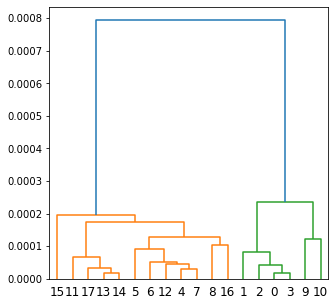

In [39]:
#  Plot Dendrogram – describe the different clusters.
import scipy.cluster.hierarchy as sch

plt.figure(figsize =(5, 5))
dendrogram = sch.dendrogram((sch.linkage(ip_dret_c, method ='ward')))

2 main clusters are identified, right <- [1,2,0,3,9,10] and left <- [the rest]
<br>in left, 15 is unlike the rest in left, while the rest in left can be seperated into two groups each alike [11,17,13,14] and left_right <- [5,6,12,4,7,8,16]. in left_right, [8,16] are alike and unlike the rest.
<br>in right, [9,10] are alike and unlike the rest.

In [40]:
# Perform agglomerative clustering
from sklearn import cluster
ac2_model = cluster.AgglomerativeClustering(n_clusters=2)
ac2 = ac2_model.fit(ip_dret_c)
ac2.labels_


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist


def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w

def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar

def getIVP(cov):
    # Compute the inverse-variance portfolio
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

In [47]:
def getHRP(cov, corr):
    # Construct a hierarchical portfolio
    dist = correlDist(corr)
    link = sch.linkage(dist, 'single')
    #dn = sch.dendrogram(link, labels=cov.index.values, label_rotation=90)
    #plt.show()
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    hrp = getRecBipart(cov, sortIx)
    return hrp.sort_index()

In [52]:
w_hrp = getHRP(ip_dret_c, ip_dret.corr())
w_ivp = getIVP(ip_dret_c)

In [53]:
np.vstack((w_ivp, w_hrp)).transpose().shape

(18, 2)

In [57]:
df_results = pd.DataFrame(index = ip_dret.columns, data=np.vstack((w_ivp, w_hrp)).transpose())
df_results

,0,1
AGG,0.420972,0.431040
TLT,0.033757,0.010560
IEF,0.173716,0.008848
LQD,0.181784,0.013448
XLB,0.011705,0.007237
XLE,0.008713,0.009033
XLF,0.011368,0.190538
XLI,0.011895,0.186131
XLK,0.008172,0.037026
XLP,0.021054,0.003220


In [58]:
print('Done!')

Done!
